# Data Analysis Project T2 2024

## Exercise 1

### 1. Data Preperation

In [17]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
#Load dataset
data = pd.read_csv('Walmart_sales.csv')

data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [19]:
#Dataset info
print("The Dataset consists of: ", data.shape[0], " rows and ", data.shape[1], " columuns")

print("\n\nCheck for null values and data types\n")
print(data.info())
print(data.describe())

print("\nnumber of unique store values\n")
print(data.nunique())

The Dataset consists of:  6435  rows and  8  columuns


Check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020 

In [20]:
# Checking what actually a row means
is_duplicated = data.duplicated(subset=['Store', 'Date']).any()
print ("There are multiple rows with same store number and date:",is_duplicated)

There are multiple rows with same store number and date: False


Therefore, we can consider that each row consists of data of a certain store in a specific week.

In [21]:
# Drop 'Fuel_Price', 'Unemployment' and Temperature columns (not needed for this task)
data.drop(['Fuel_Price', 'Unemployment', 'Temperature'], axis=1, inplace=True)

The 'Fuel_Price', 'Unemployment' and 'Temperature' columns were dropped from the dataset as these columns provide no value to the tasks required to be completed in this exercise.

In [22]:
# Convert date column to datetime datatype.
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data['Date'].dtype)

data.head()

datetime64[ns]


,Store,Date,Weekly_Sales,Holiday_Flag,CPI
0,1,2010-02-05,1643690.90,0,211.096358
1,1,2010-02-12,1641957.44,1,211.242170
2,1,2010-02-19,1611968.17,0,211.289143
3,1,2010-02-26,1409727.59,0,211.319643
4,1,2010-03-05,1554806.68,0,211.350143


In [23]:
# Convert store to string
data[['Store']] = data[['Store']].astype(str)

Store number was converted to a string as it provided no mathematical purpose and just an indicator for the store ID

In [24]:
# Remove duplicates
duplicate_count = data[data.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)

Duplicates found:  0


In [25]:
# Check for missing data
missing_data = data.isnull().sum()
print("Number of missing data(null values):")
print(missing_data)

Number of missing data(null values):
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
CPI             0
dtype: int64


There are no duplicates in the dataset and no missing data in any column. Dataset is now ready to be used for analysis.

In [26]:
# Save cleaned dataset to a CSV
data.to_csv('cleaned_dataset.csv', index=False)

### 2. Product Performance Analysis

#### Average weekly sales by store and holiday flag


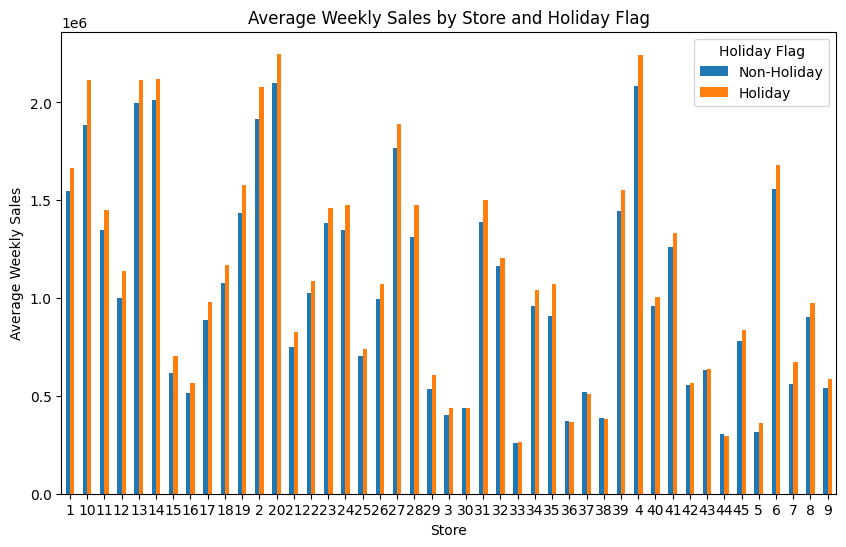

In [27]:
#Group by store and holiday flag
avg_sales = data.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

# Plotting the average weekly sales by store and holiday flag
avg_sales.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Average Weekly Sales by Store and Holiday Flag')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.legend(title='Holiday Flag', labels=['Non-Holiday', 'Holiday'])

# Display the plot
plt.show()

The average of weekly sales were considered to perform a proper analysis on the effect of the holiday as holidays are very few compared with non-holidays. When analysing the above graph plotted for weekly sales by store and holday flag, it can be seen that most stores had better sales during holidays. Store number 30 had similar sales records during holidays and non-holidays.Store number 36, 37, 38 and 44 had lower sales during holidays.

#### Analyse the trend of weekly sales over time for a single store

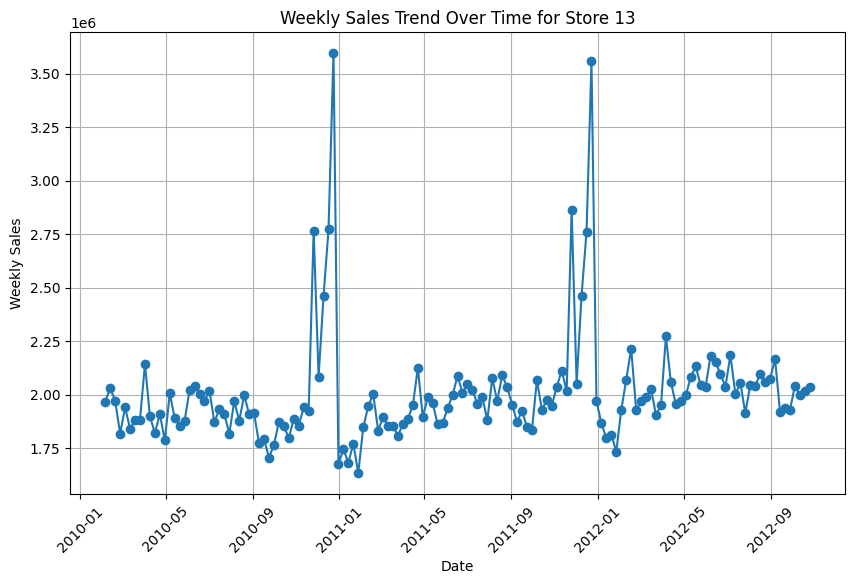

In [28]:
store_id = '13'
store_data = data[data['Store'] == store_id]

# Plotting the weekly sales trend over time for the store
plt.figure(figsize=(10, 6))
plt.plot(store_data['Date'], store_data['Weekly_Sales'], marker='o', linestyle='-')

plt.title(f'Weekly Sales Trend Over Time for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

When analysing the above graph plotted for weekly sales over time for store number 13, we can see that the sales have reached a peak at the end of every year in the last weeks of December. After that, at the start of every year, at the end of the first month, lowest sales have been recorded. The sales trends seem to continue in the same pattern every year.

### Sales Trends Analysis

#### Sales trends over a month

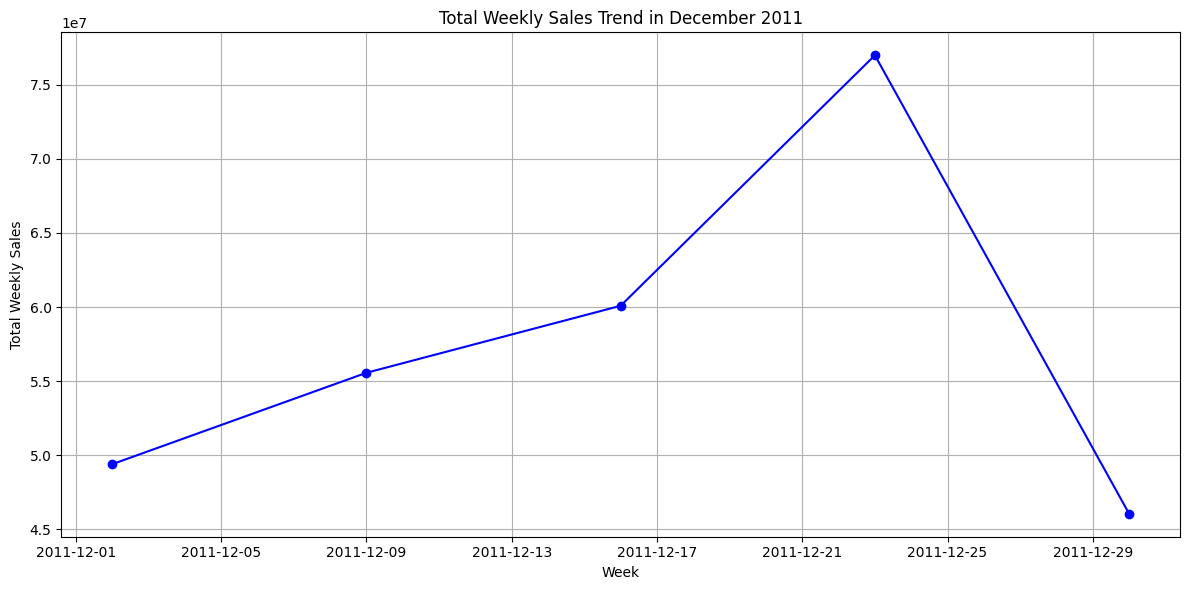

In [29]:
year = 2011
month = 12

# Filter the data for the selected month and year
dec_2011_data = data[(data['Date'].dt.year == year) & (data['Date'].dt.month == month)]

# Plotting the weekly sales trend over the month

# Group by 'Date' to get the total weekly sales across all stores
total_weekly_sales_dec_2011 = dec_2011_data.groupby('Date')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(total_weekly_sales_dec_2011, marker='o', linestyle='-', color='blue')
plt.title('Total Weekly Sales Trend in December 2011')
plt.xlabel('Week')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

The above graph was plotted for total weekly sales of all stores in december 2011 for analysis of sales trends within this month. The total sales of the stores keep increasing from the start of the month and the gradient keeps increasing when its getting closer to the middle of the month showing a high rate of increase in sales in the middle of the month. It can be seen that sales reaching a peak when its 2 days left for christmas and goes down again after than reaching the lowest sales during the month on the last day of the month. The increase of sales during special seasonalities like christmas can be identified by analysing this graph.

#### Analysing seasonality trends over seasons

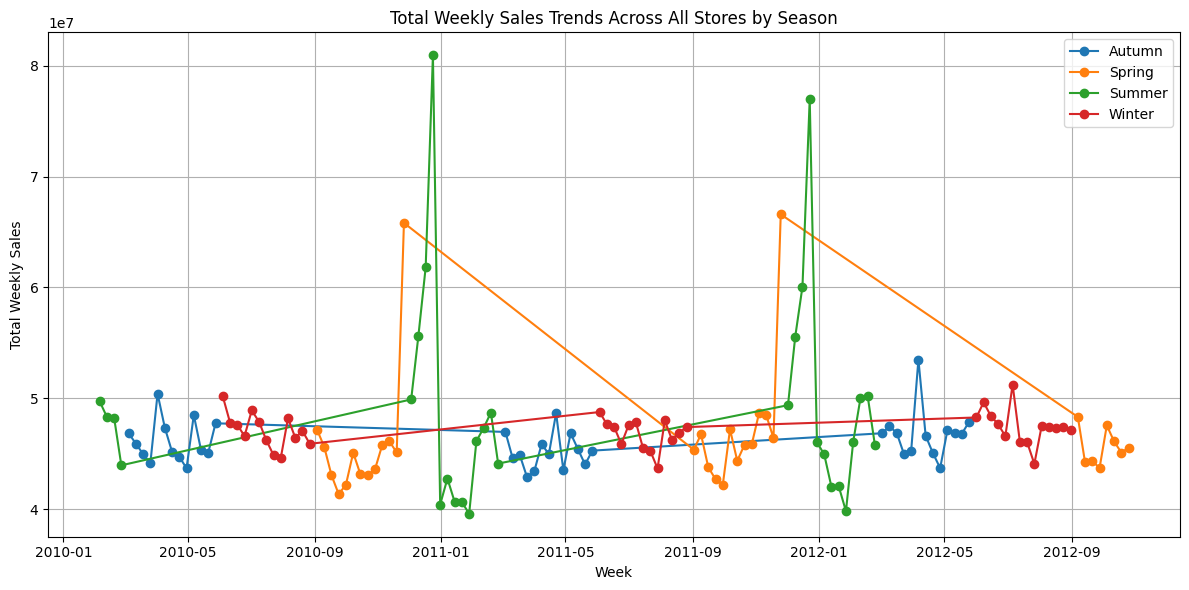

In [30]:
#Assuming its an Australian Dataset and considering australian seasons
def date_to_season(date):
    month = date.month
    
    if month in [9, 10, 11]:
        return "Spring"
    elif month in [12, 1, 2]:
        return "Summer"
    elif month in [3, 4, 5]:
        return "Autumn"
    else:
        return "Winter"

data['Season'] = data['Date'].apply(date_to_season)
    
total_weekly_sales_by_season = data.groupby(['Season', 'Date'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Line for each season
for season, sales in total_weekly_sales_by_season.groupby('Season'):
    plt.plot(sales['Date'], sales['Weekly_Sales'], marker='o', linestyle='-', label=season)


plt.title('Total Weekly Sales Trends Across All Stores by Season')
plt.xlabel('Week')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The data was grouped by seasons assuming that this datasets contains sales records are related to Australia and considering the seasons in the country according to the month. The above graph was plotted to find if there is any sales trends by seasonality considering seasons. Four line graphs were plotted in same plot to analyse the weekly sales with the seasons. We can see that sales start to increase rapidly increase with a high gradient at the start of the summer in every year. Then it rapidly decrease at the end of the year which still is the summer and reaches the lowest sales. Afterwards, sales fluctuates throughout the summer. Sales reach a second highest peak every year during the end of spring with a very rapid increase in sales at a high gradient. The sales kept fluctuating throughout the spring until the end of spring. A clear pattern cannot be identified in autumn and winter as the sales kept fluctuating throughout these seasons in different ways each year.